In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

%matplotlib inline

#한글 글씨체 사용
mpl.rc('font',family = 'Malgun Gothic')

#글씨를 선명히
set_matplotlib_formats

#음수처리
mpl.rc('axes', unicode_minus = False)

pd.options.display.max_columns = 100

In [2]:
table1 = pd.read_csv('./test/201701.csv')

In [3]:
table1.head(3)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed


In [4]:
table1.tail(3)

,Name,date,amount,product,result
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


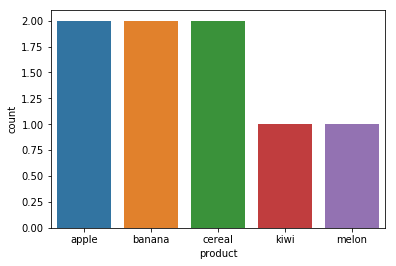

In [5]:
sns.countplot(table1['product'])

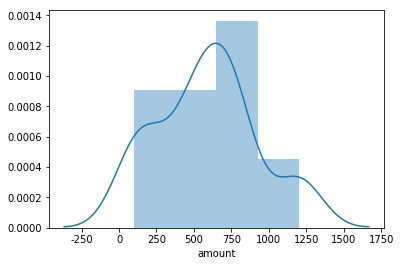

In [6]:
sns.distplot(table1['amount']);

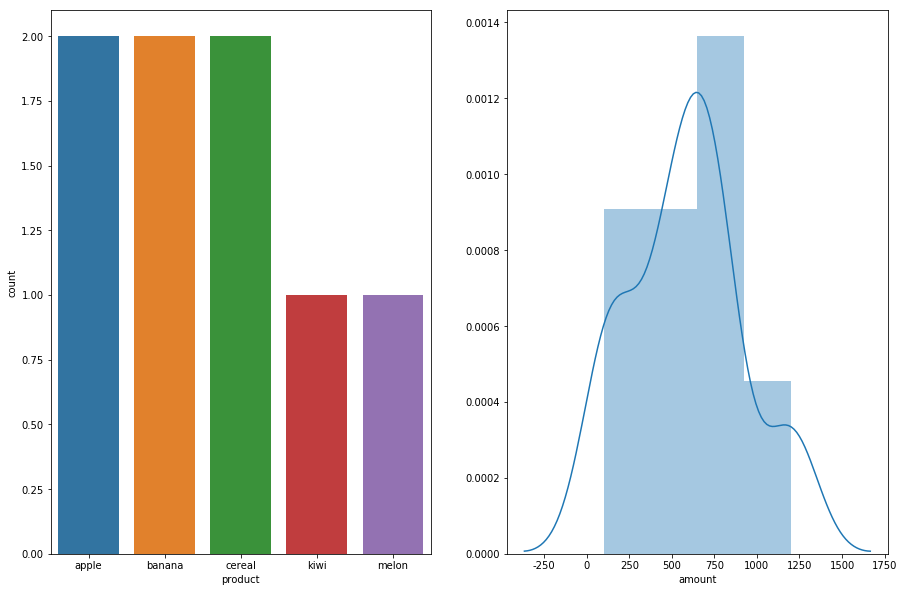

In [43]:
figure,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,10)
sns.countplot(table1['product'],ax = ax1)
sns.distplot(table1['amount'], ax = ax2);

## Date

In [8]:
table1['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [9]:
table1['date(clean)'] = pd.to_datetime(table1['date'])

In [10]:
table1

,Name,date,amount,product,result,date(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05
3,Park,2017-01-07,500,cereal,canceled,2017-01-07
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10


In [11]:
table1['date(clean)'].dt.month

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: date(clean), dtype: int64

In [12]:
table1['date(clean)'].dt.weekday_name

0      Sunday
1     Tuesday
2    Thursday
3    Saturday
4      Sunday
5      Monday
6      Monday
7     Tuesday
Name: date(clean), dtype: object

In [13]:
table1['date(month)'] = table1['date(clean)'].dt.month
table1['date(day)'] = table1['date(clean)'].dt.day
table1['date(day_of_week'] = table1['date(clean)'].dt.weekday_name
table1[['date(day_of_week','date(month)','date(day)']].head(2)

,date(day_of_week,date(month),date(day)
0,Sunday,1,1
1,Tuesday,1,3


## Replace

In [14]:
table1['result']

0    confirmed
1    confirmed
2    confirmed
3     canceled
4    confirmed
5    confirmed
6    confirmed
7     canceled
Name: result, dtype: object

In [15]:
table1['result(clean)'] = table1['result'].replace('confirmed','확인').replace('canceled','취소')
table1[['result','result(clean)']]

,result,result(clean)
0,confirmed,확인
1,confirmed,확인
2,confirmed,확인
3,canceled,취소
4,confirmed,확인
5,confirmed,확인
6,confirmed,확인
7,canceled,취소


## Apply(DataFrame 핸들링에 있어 중요한 함수)

In [16]:
def num(data):
    return data
table1.apply(num)

,Name,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week,result(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,취소


In [36]:
def function1(row):
    return row[0:4]+"년도"
table1['date'].apply(function1)

0    2017년도
1    2017년도
2    2017년도
3    2017년도
4    2017년도
5    2017년도
6    2017년도
7    2017년도
Name: date, dtype: object

In [17]:
table1.describe()

,amount,date(month),date(day)
count,8.000000,8.0,8.000000
mean,587.500000,1.0,6.500000
std,348.209707,0.0,3.207135
min,100.000000,1.0,1.000000
25%,425.000000,1.0,4.500000
50%,600.000000,1.0,7.500000
75%,725.000000,1.0,9.000000
max,1200.000000,1.0,10.000000


In [19]:
table1[['product','result']].describe() #문자형에 대해서도 적용이 된다.

,product,result
count,8,8
unique,5,2
top,banana,confirmed
freq,2,6


## Indexing

In [21]:
table1['result']

0    confirmed
1    confirmed
2    confirmed
3     canceled
4    confirmed
5    confirmed
6    confirmed
7     canceled
Name: result, dtype: object

In [29]:
table1[(table1['amount'] > 300) & (table1['result'] == 'canceled')]

,Name,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week,result(clean)
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소


In [32]:
table1.loc[2:5][['amount','product']]

,amount,product
2,800,apple
3,500,cereal
4,1200,kiwi
5,100,melon


## Column name

In [39]:
table1.rename(columns = {'Name':'이름'})
# table1(inplace = True)로 하면 바뀐 것을 알 수 있다.

,이름,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week,result(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,취소


## Subplot

In [40]:
table1

,Name,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week,result(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,취소


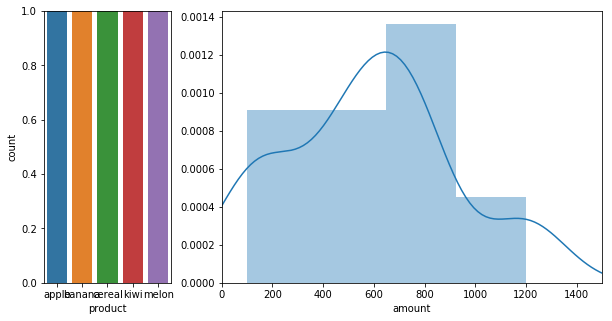

In [46]:
figure,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, gridspec_kw={'width_ratios' :[1,3]})
figure.set_size_inches(10,5)

ax1.set_ylim(0,1)
ax2.set_xlim(0,1500)

sns.countplot(table1['product'],ax = ax1)
sns.distplot(table1['amount'], ax = ax2)